In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data load & merge

In [2]:
# Read final web data dataframes
df_wd_1 = pd.read_csv("df_final_web_data_pt_1.txt")
df_wd_2 = pd.read_csv("df_final_web_data_pt_2.txt")

In [3]:
df_wd_1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [4]:
df_wd_2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [36]:
df_wd_merged = pd.concat([df_wd_1, df_wd_2])
df_wd_merged

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [6]:
""" # Merge final web data dataframes
df_wd_merged = pd.merge(df_wd_1, df_wd_2, on= "client_id")
df_wd_merged """

' # Merge final web data dataframes\ndf_wd_merged = pd.merge(df_wd_1, df_wd_2, on= "client_id")\ndf_wd_merged '

In [7]:
# Read final demo dataframe
df_demo= pd.read_csv("df_final_demo.txt")
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [8]:
# Read final experiment clients dataframe
df_exp_clients= pd.read_csv("df_final_experiment_clients.txt")
df_exp_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [9]:
# Convertir a conjuntos los client_id de ambos DataFrames
clients_demo = set(df_demo['client_id'])
clients_exp_clients = set(df_exp_clients['client_id'])

# Encontrar los client_id que están en df_demo pero no en df_exp_clients
clients_missing = clients_demo - clients_exp_clients

# Mostrar los client_id que faltan
if clients_missing:
    print(f"Client_id que están en df_demo pero no en df_exp_clients: {list(clients_missing)}")
else:
    print("Todos los client_id de df_demo están presentes en df_exp_clients.")


Todos los client_id de df_demo están presentes en df_exp_clients.


In [10]:
# Convertir a conjuntos los client_id de ambos DataFrames
clients_demo = set(df_demo['client_id'])
clients_exp_clients = set(df_exp_clients['client_id'])

# Encontrar los client_id que están en df_exp_clients pero no en df_demo
clients_extra = clients_exp_clients - clients_demo

# Mostrar los client_id que faltan en df_demo
if clients_extra:
    print(f"Client_id que están en df_exp_clients pero no en df_demo: {list(clients_extra)}")
else:
    print("Todos los client_id de df_exp_clients están presentes en df_demo.")


Todos los client_id de df_exp_clients están presentes en df_demo.


## Dataset discovery

In [11]:
# Show dataframe wed data info
df_wd_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755405 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 34.6+ MB


In [12]:
# Show dataframe demo info
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


In [13]:
# Show dataframe experiment clients info
df_exp_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  70609 non-null  int64 
 1   Variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [14]:
# Show dtypes numeric dataframe web data
df_wd_merged.select_dtypes("number").nunique()

client_id    120157
dtype: int64

In [15]:
# Show dtypes numeric dataframe demo
df_demo.select_dtypes("number").nunique()

client_id           70609
clnt_tenure_yr         54
clnt_tenure_mnth      482
clnt_age              165
num_accts               8
bal                 70333
calls_6_mnth            8
logons_6_mnth           9
dtype: int64

In [16]:
# Show dtypes numeric dataframe experiment clients
df_exp_clients.select_dtypes("number").nunique()

client_id    70609
dtype: int64

In [17]:
# Checking for missing data in dataframe web data
df_wd_merged.isnull().sum().sort_values(ascending=False)

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [18]:
# Checking for missing data in dataframe demo
df_demo.isnull().sum().sort_values(ascending=False)

clnt_age            15
clnt_tenure_yr      14
clnt_tenure_mnth    14
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
client_id            0
dtype: int64

In [19]:
# Checking for missing data in dataframe experiment clients
df_exp_clients.isnull().sum().sort_values(ascending=False)

Variation    20109
client_id        0
dtype: int64

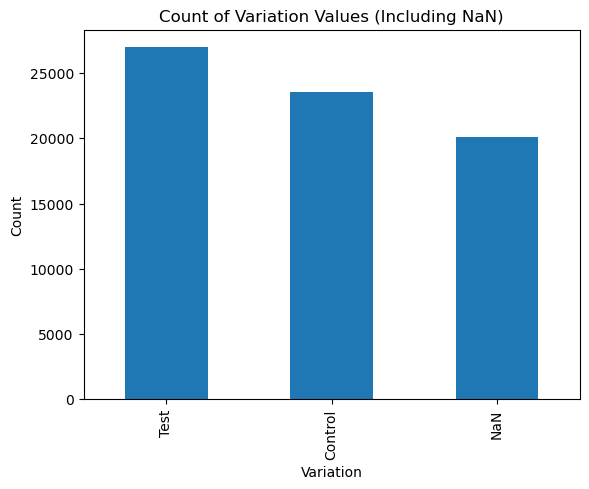

In [20]:
import matplotlib.pyplot as plt

# Reemplaza los NaN por una etiqueta y cuenta los valores
variation_counts = df_exp_clients['Variation'].fillna('NaN').value_counts()

# Crea el gráfico de barras
variation_counts.plot(kind='bar')
plt.title("Count of Variation Values (Including NaN)")
plt.xlabel("Variation")
plt.ylabel("Count")
plt.show()

In [21]:
# Drop NaN values
df_exp_clients_clean = df_exp_clients.dropna()
df_exp_clients_clean.nunique()

client_id    50500
Variation        2
dtype: int64

In [22]:
# Merge dataframe experiment clients with dataframe demo 
df_exp_clients_demo = pd.merge(df_exp_clients_clean, df_demo, on='client_id', how='inner')
df_exp_clients_demo

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
50495,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0
50496,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
50497,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0
50498,5230357,Test,23.0,278.0,30.5,M,2.0,61349.70,0.0,3.0


El dataframe "df_exp_clients_demo" es el resultante del dataframe de experiment clients junto al dataframe demo eliminando los clientes que no se han tenido en cuenta para participar en el test A/B.

In [23]:
df_wd_merged

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [24]:
df_wd_merged.client_id.nunique()

120157

Aquí se ve el total de clientes de los cuales tenemos registro de su participación en el test A/B

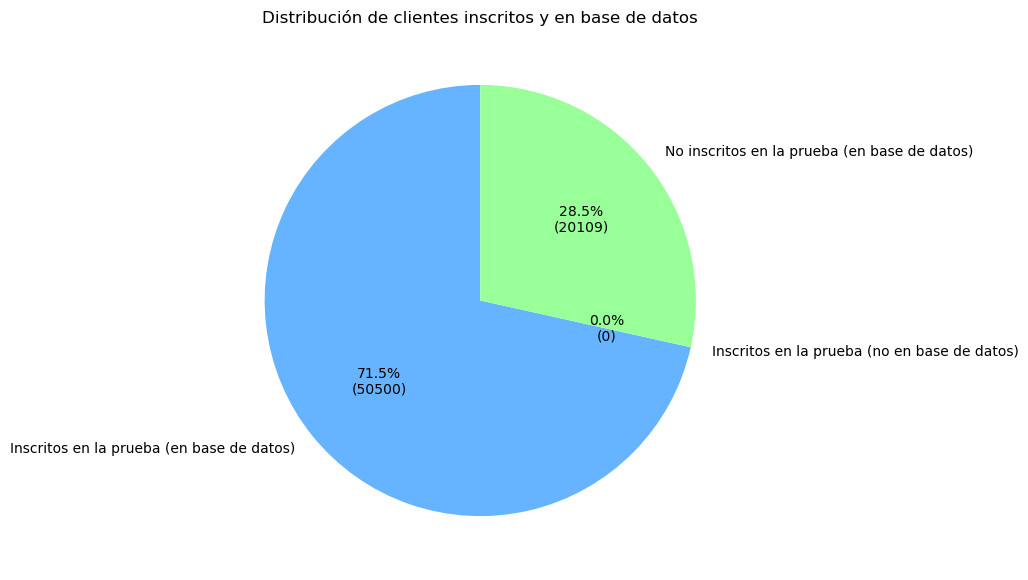

In [37]:
import matplotlib.pyplot as plt

# Convertir a conjuntos los client_id de ambos DataFrames
clients_inscritos = set(df_exp_clients['client_id'])
clients_en_base_datos = set(df_demo['client_id'])

# 1. Clientes que están inscritos en la prueba y también en la base de datos (intersección)
clients_realized = clients_inscritos.intersection(clients_en_base_datos)

# 2. Clientes que están inscritos en la prueba pero no en la base de datos (diferencia)
clients_not_in_db = clients_inscritos - clients_en_base_datos

# 3. Clientes que están en la base de datos pero no inscritos en la prueba
clients_not_signed_up = clients_en_base_datos - clients_inscritos

# Crear un diccionario con los resultados
result = {
    'Inscritos en la prueba (en base de datos)': len(clients_realized),
    'Inscritos en la prueba (no en base de datos)': len(clients_not_in_db),
    'No inscritos en la prueba (en base de datos)': len(clients_not_signed_up)
}

# Función para formatear las etiquetas mostrando porcentaje y número total
def simple_autopct(pct):
    total = sum(result.values())
    absolute = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({absolute:d})'

# Crear la gráfica de tarta
plt.figure(figsize=(7, 7))
plt.pie(result.values(), labels=result.keys(), autopct=simple_autopct, startangle=90, colors=['#66b3ff', '#ff9999', '#99ff99'])
plt.title('Distribución de clientes inscritos y en base de datos')
plt.show()


No coincide el total de clientes que han hecho la prueba y que tenemos datos. Por lo que necesitamos saber cuales clientes han hecho la prueba y no tenemos datos.


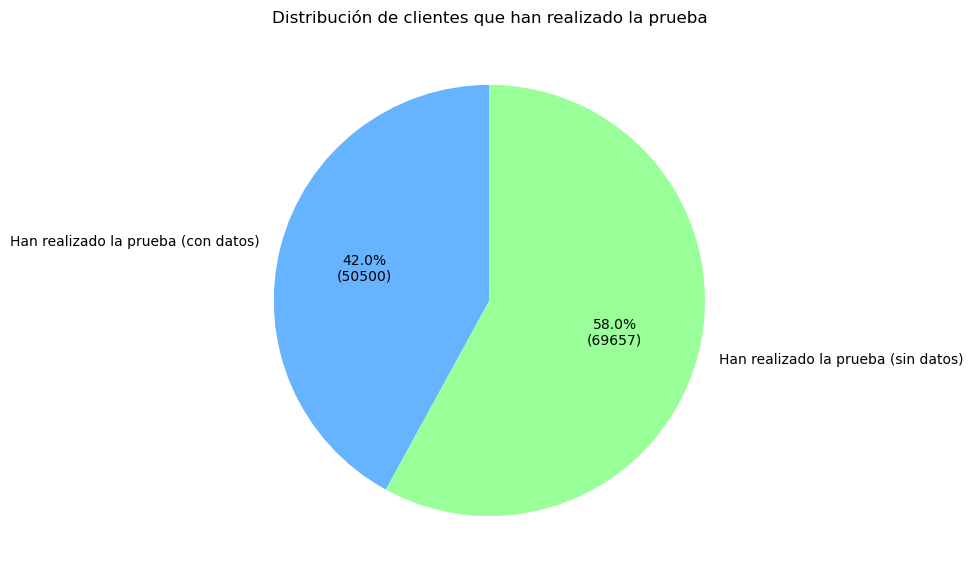

In [26]:
import matplotlib.pyplot as plt

# Función personalizada para mostrar el porcentaje y el número total
def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f"{pct:.1f}%\n({absolute:d})"

# Convertir a conjuntos los client_id de ambos DataFrames
clients_demo = set(df_exp_clients_demo['client_id'])
clients_wd_merged = set(df_wd_merged['client_id'])

# 1. Clientes que han realizado la prueba (con datos)
clients_realized = clients_demo.intersection(clients_wd_merged)

# 2. Clientes que han realizado la prueba pero no están en df_demo
clients_not_in_demo = clients_wd_merged - clients_demo

# Crear un diccionario con los resultados (solo los que han realizado la prueba)
result = {
    'Han realizado la prueba (con datos)': len(clients_realized),
    'Han realizado la prueba (sin datos)': len(clients_not_in_demo)
}

# Crear la gráfica de tarta
plt.figure(figsize=(7, 7))
plt.pie(result.values(), labels=result.keys(), autopct=lambda pct: func(pct, list(result.values())), 
        startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Distribución de clientes que han realizado la prueba')
plt.show()

In [35]:
import pandas as pd
import plotly.express as px

# Convertir a conjuntos los client_id de ambos DataFrames
clients_demo = set(df_exp_clients_demo['client_id'])
clients_wd_merged = set(df_wd_merged['client_id'])

# 1. Clientes que han realizado la prueba (con datos)
clients_realized = clients_demo.intersection(clients_wd_merged)

# 2. Clientes que han realizado la prueba pero no están en df_demo
clients_not_in_demo = clients_wd_merged - clients_demo

# Filtrar el DataFrame para solo los clientes que han realizado la prueba
df_exp_clients_clean = df_exp_clients_clean[df_exp_clients_clean['client_id'].isin(clients_wd_merged)]

# Etiquetar clientes "con datos" o "sin datos" y Test/Control
df_exp_clients_clean['Test_Control'] = df_exp_clients_clean.apply(
    lambda row: f"Han realizado la prueba (con datos)" 
    if row['client_id'] in clients_realized 
    else f"Han realizado la prueba (sin datos)", axis=1)

# Crear un DataFrame con las categorías jerárquicas
df_exp_clients_clean['Category'] = df_exp_clients_clean['Test_Control']
df_exp_clients_clean['Subcategory'] = df_exp_clients_clean['Variation']  # Test o Control

# Crear el gráfico de Sunburst usando Plotly Express
fig = px.sunburst(
    df_exp_clients_clean, 
    path=['Category', 'Subcategory'],  # Definimos las jerarquías
    values=None,  # Cuenta los valores automáticamente
    title="Distribución de clientes que han realizado la prueba (Test y Control)"
)

# Mostrar la gráfica
fig.show()


In [28]:
# Convertir los client_id de ambos DataFrames en conjuntos
clients_demo = set(df_exp_clients_demo['client_id'])
clients_wd_merged = set(df_wd_merged['client_id'])

# Calcular los client_id que están en df_wd_merged pero no en df_exp_clients_demo
clients_not_in_demo = clients_wd_merged - clients_demo

# Mostrar el número de client_id que están en df_wd_merged pero no en df_exp_clients_demo
print(f"Número de client_id en df_wd_merged que no están en df_exp_clients_demo: {len(clients_not_in_demo)}")


Número de client_id en df_wd_merged que no están en df_exp_clients_demo: 69657


In [29]:
# Agrupar por "visitor_id_x" y contar los valores únicos de "visit_id_x" para cada grupo
visitor_check = df_wd_merged.groupby('visitor_id')['visit_id'].nunique()

# Filtrar aquellos "visitor_id_x" que tienen más de un valor único en "visit_id_x"
inconsistent_visitors = visitor_check[visitor_check > 1]

# Mostrar los "visitor_id_x" que tienen valores diferentes en "visit_id_x"
print(inconsistent_visitors)


visitor_id
100052114_10880025650    2
10008560_69050398598     2
100189756_32488226026    2
10020962_44667956860     3
100265469_84689631452    2
                        ..
999881764_47724334615    2
999919504_90969113434    2
999963461_11137641019    3
999986924_89514756905    7
999997533_50295491521    2
Name: visit_id, Length: 21568, dtype: int64


## Final clients in df_wd_merged with client data

In [30]:
# Create final dataframe of final clients with client data with A/B test
df_wd_client_data = pd.merge(df_wd_merged, df_exp_clients_demo, on='client_id', how='inner')
df_wd_client_data.client_id.nunique()

50500